In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Number of unique countries

In [5]:
# change the column names
df.rename(index=str, columns={'InvoiceNo':'invoice_num', 'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
cust_id         406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


### Detect Any Missing Values

In [7]:
df.isnull().sum().sort_values(ascending=False)


cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [8]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Change invoice_date format

In [9]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [10]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

### Remove rows with missing values

In [12]:
new_df = df.dropna()

In [13]:
new_df.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     406829 non-null object
stock_code      406829 non-null object
description     406829 non-null object
quantity        406829 non-null int64
invoice_date    406829 non-null datetime64[ns]
unit_price      406829 non-null float64
cust_id         406829 non-null float64
country         406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
new_df.describe()

,quantity,unit_price,cust_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Count and remove Quantity with negative values

In [16]:
len(new_df[new_df.quantity < 1])

8905

In [17]:
new_df = new_df[new_df.quantity>0]

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     397924 non-null object
stock_code      397924 non-null object
description     397924 non-null object
quantity        397924 non-null int64
invoice_date    397924 non-null datetime64[ns]
unit_price      397924 non-null float64
cust_id         397924 non-null float64
country         397924 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


### Add "amount_spent" column

In [19]:
new_df['amount_spent'] = new_df['quantity']*new_df['unit_price']

In [20]:
new_df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
# rearrange all the columns for easy reference
new_df = new_df[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

In [22]:
new_df.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom


### Create new colums for Month, Day and Hour

In [23]:
new_df.insert(loc=2, column='year_month', value=new_df['invoice_date'].map(lambda x: 100*x.year + x.month))
new_df.insert(loc=3, column='month', value=new_df.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
new_df.insert(loc=4, column='day', value=(new_df.invoice_date.dt.dayofweek)+1)
new_df.insert(loc=5, column='hour', value=new_df.invoice_date.dt.hour)

In [24]:
new_df.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom


# Data Visualization

In [25]:
 new_df.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


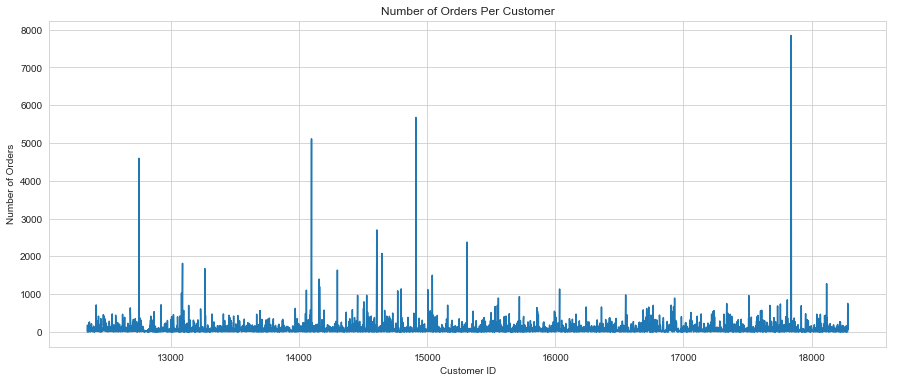

In [26]:
orders = new_df.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Per Customer')
plt.show()

In [27]:
orders.sort_values(by='invoice_num', ascending=False).head()

,cust_id,country,invoice_num
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


## Spend per customer per country

In [177]:
cust_spend = new_df.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()


## Customers who spent the most

In [129]:
top_customers =new_df.groupby(by=['cust_id'], as_index=False)['amount_spent'].sum()

In [147]:
cust_spend.sort_values(by='amount_spent', ascending=False).head()


,cust_id,country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


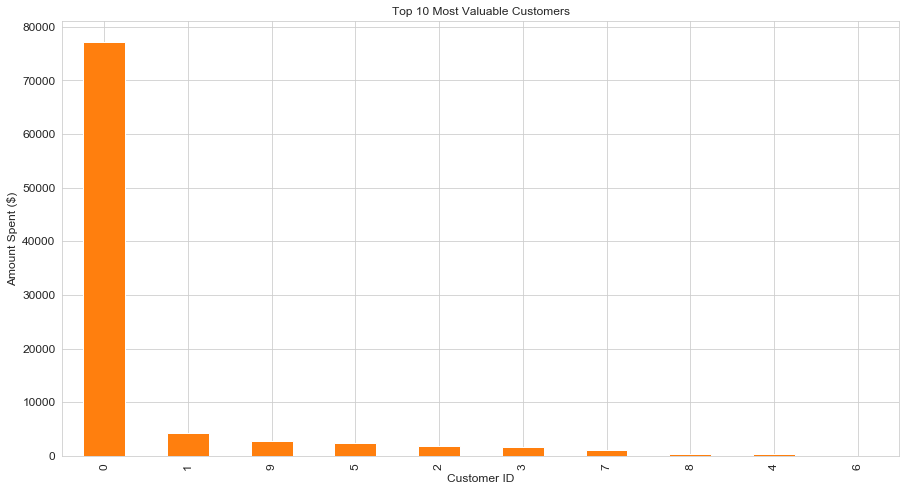

In [187]:
plt.subplots(figsize=(15,8))
top_customers['amount_spent'].head(10).sort_values(ascending=False).plot(kind='bar', fontsize=12, color=color[1])
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Amount Spent ($)', fontsize=12)
plt.title('Top 10 Most Valuable Customers', fontsize=12)
plt.show()


## Find total spend by Country

In [59]:
group_country_spend = new_df.groupby('country')['amount_spent'].sum().sort_values()

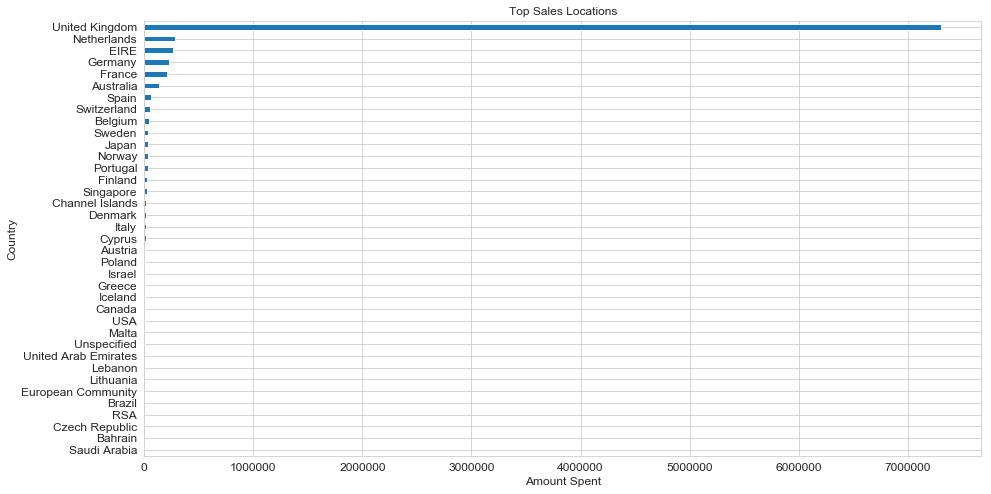

In [60]:
# plot total spend per country 
plt.subplots(figsize=(15,8))
group_country_spend.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Amount Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top Sales Locations', fontsize=12)
plt.show()

In [34]:
new_df.groupby(by=['country'], as_index=False)['amount_spent'].sum().round(2).sort_values(by='amount_spent', ascending=False)

,country,amount_spent
35,United Kingdom,7308391.55
23,Netherlands,285446.34
10,EIRE,265545.90
14,Germany,228867.14
13,France,209024.05
0,Australia,138521.31
30,Spain,61577.11
32,Switzerland,56443.95
3,Belgium,41196.34
31,Sweden,38378.33


In [35]:
group_country_spend = new_df.groupby('country')['amount_spent'].sum().sort_values()
del group_country_spend['United Kingdom']

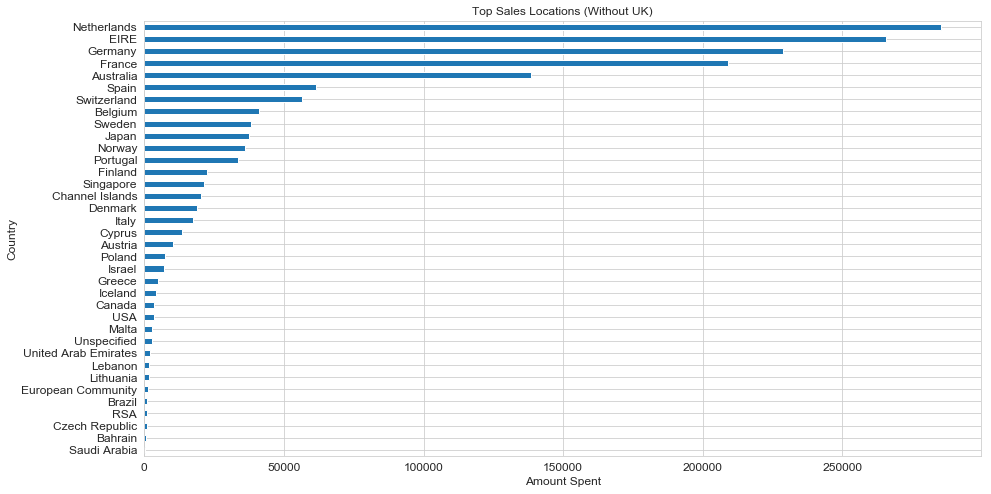

In [57]:
# plot total spend per country without the UK
plt.subplots(figsize=(15,8))
group_country_spend.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Amount Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top Sales Locations (Without UK)', fontsize=12)
plt.show()

[Text(0, 0, 'Dec_10'),
 Text(0, 0, 'Jan_11'),
 Text(0, 0, 'Feb_11'),
 Text(0, 0, 'Mar_11'),
 Text(0, 0, 'Apr_11'),
 Text(0, 0, 'May_11'),
 Text(0, 0, 'Jun_11'),
 Text(0, 0, 'July_11'),
 Text(0, 0, 'Aug_11'),
 Text(0, 0, 'Sep_11'),
 Text(0, 0, 'Oct_11'),
 Text(0, 0, 'Nov_11'),
 Text(0, 0, 'Dec_11')]

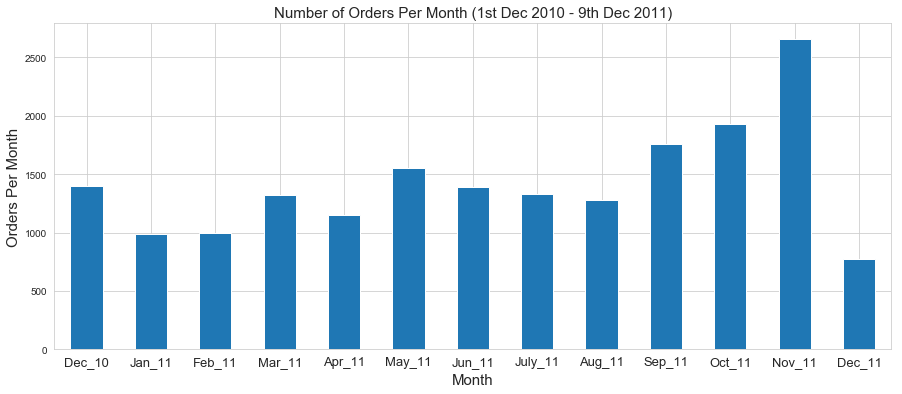

In [37]:
monthly_order = new_df.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
monthly_order.set_xlabel('Month',fontsize=15)
monthly_order.set_ylabel('Orders Per Month',fontsize=15)
monthly_order.set_title('Number of Orders Per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)

monthly_order.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

## Comparing December Sales of 2010 and 2011
December 2011 is showing much less sales compared to December 2010. 
But seeing that we only have data until the 9th of December 2011, we can expect the final sales outlook for December 2011 to be favourable.

In [110]:
new_df.groupby(by=['description'], as_index=False)['quantity'].sum().head(20).sort_values(by ='quantity', ascending=False)



,description,quantity
12,10 colour spaceboy pen,6267
19,12 pencil small tube woodland,4007
8,set 2 tea towels i love london,2627
2,dolly girl beaker,2398
13,12 coloured party balloons,2110
1,50's christmas gift bag large,1885
7,red spot gift bag large,1700
18,12 message cards with envelopes,1628
17,12 ivory rose peg place settings,749
9,spaceboy baby gift set,450


## Top Selling Products

In [46]:
len(new_df['stock_code'].unique())

3665

In [115]:
products_sold =new_df.groupby('description')['quantity'].sum()

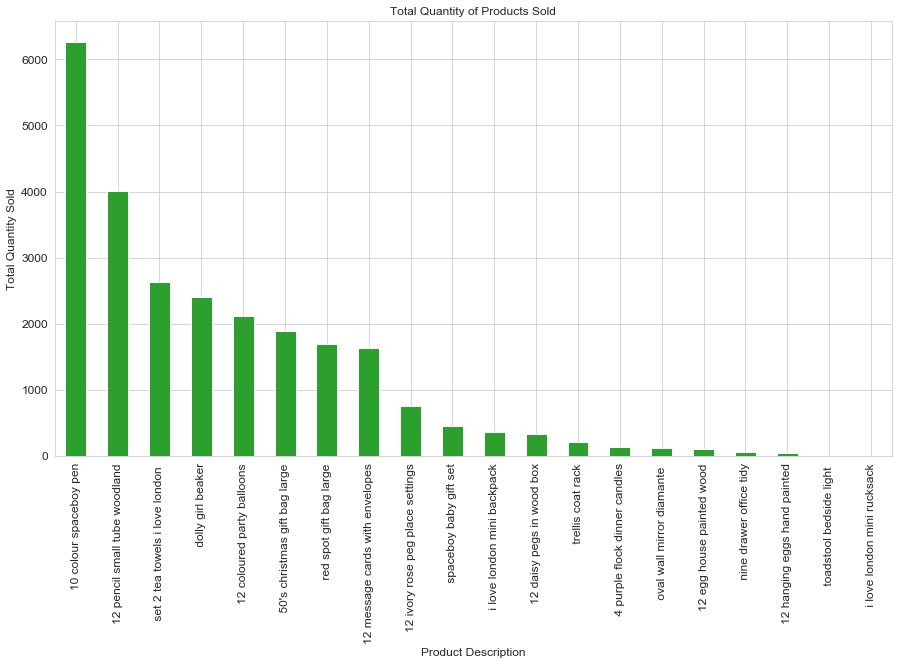

In [119]:
# plot total products sold
plt.subplots(figsize=(15,8))
products_sold.head(20).sort_values(ascending=False).plot(kind='bar', fontsize=12, color=color[2])
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.title('Total Quantity of Products Sold', rotation='horizontal', fontsize=12)
plt.show()

In [ ]:
## Average orders per day
new_df.groupby('invoice_num')['day'].unique().value_counts().sort_index()

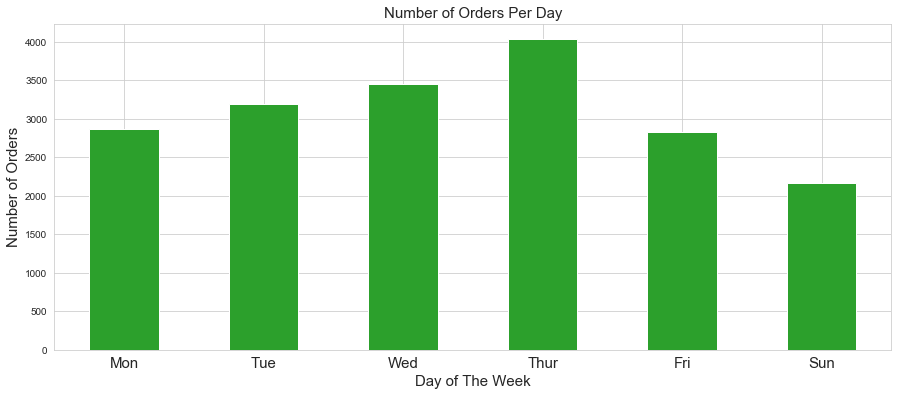

In [45]:
daily_orders = new_df.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot('bar',color=color[2],figsize=(15,6))
daily_orders.set_xlabel('Day of The Week',fontsize=15)
daily_orders.set_ylabel('Number of Orders',fontsize=15)
daily_orders.set_title('Number of Orders Per Day',fontsize=15)
daily_orders.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [44]:
new_df.tail()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
541904,581587,2011-12-09 12:50:00,201112,12,5,12,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680.0,France
541905,581587,2011-12-09 12:50:00,201112,12,5,12,22899,children's apron dolly girl,6,2.10,12.60,12680.0,France
541906,581587,2011-12-09 12:50:00,201112,12,5,12,23254,childrens cutlery dolly girl,4,4.15,16.60,12680.0,France
541907,581587,2011-12-09 12:50:00,201112,12,5,12,23255,childrens cutlery circus parade,4,4.15,16.60,12680.0,France
541908,581587,2011-12-09 12:50:00,201112,12,5,12,22138,baking set 9 piece retrospot,3,4.95,14.85,12680.0,France


In [43]:
new_df.describe()

,year_month,month,day,hour,quantity,unit_price,amount_spent,cust_id
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,201101.038417,7.612537,3.614555,12.728247,13.021823,3.116174,22.394749,15294.315171
std,23.836517,3.416527,1.928274,2.273535,180.420210,22.096788,309.055588,1713.169877
min,201012.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,12346.000000
25%,201104.000000,5.000000,2.000000,11.000000,2.000000,1.250000,4.680000,13969.000000
50%,201107.000000,8.000000,3.000000,13.000000,6.000000,1.950000,11.800000,15159.000000
75%,201110.000000,11.000000,5.000000,14.000000,12.000000,3.750000,19.800000,16795.000000
max,201112.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,168469.600000,18287.000000


In [55]:
new_df.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

In [56]:
orders_per_hour = new_df.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

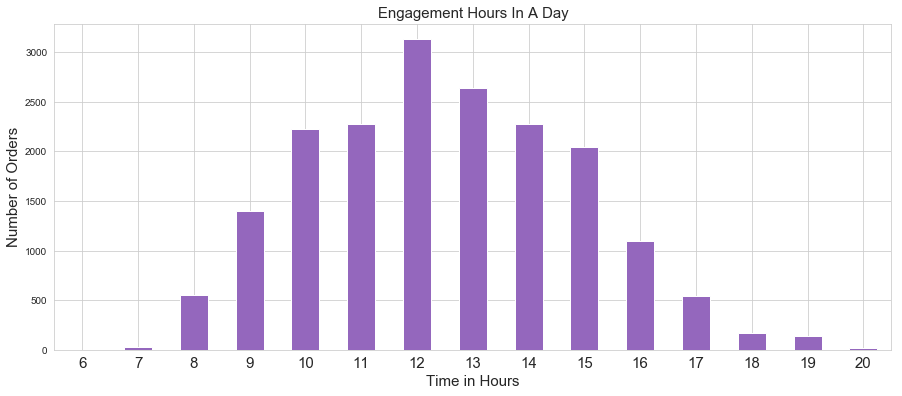

In [125]:
orders_per_hour = new_df.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[4],figsize=(15,6))
orders_per_hour.set_xlabel('Time in Hours',fontsize=15)
orders_per_hour.set_ylabel('Number of Orders',fontsize=15)
orders_per_hour.set_title('Engagement Hours In A Day',fontsize=15)
#orders_per_hour.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
orders_per_hour.set_xticklabels(range(6,21),rotation='horizontal', fontsize=15)
plt.show()

# Items with a price of zero (marketing items?)
Looking at our data, we have 40 items with prices of zero. Perhaps this items were used as marketing items to help drive sales

In [69]:
(new_df['unit_price'] == 0).value_counts()

False    397884
True         40
Name: unit_price, dtype: int64

In [76]:
free_items = new_df[new_df.unit_price == 0]

In [87]:
len(free_items.stock_code.unique())

35

In [95]:
free_items[(free_items.quantity==12540)]

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
502122,578841,2011-11-25 15:57:00,201111,11,5,15,84826,asstd design 3d paper stickers,12540,0.0,0.0,13256.0,United Kingdom


In [161]:
new_df.to_csv('new_df.csv')